### 1. load COVID-19

In [131]:
import pandas as pd
df=pd.read_excel('COVID-19.xlsx')

In [132]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-08-22,22,8,2020,38,0,Afghanistan,AF,AFG,38041757.0,Asia,2.310619
1,2020-08-21,21,8,2020,97,2,Afghanistan,AF,AFG,38041757.0,Asia,2.415766
2,2020-08-20,20,8,2020,160,8,Afghanistan,AF,AFG,38041757.0,Asia,2.268560
3,2020-08-19,19,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.024092
4,2020-08-18,18,8,2020,3,0,Afghanistan,AF,AFG,38041757.0,Asia,2.239644


### 2. select month, cases, countrycode

In [133]:
df = df.filter(items=['month', 'geoId','cases','deaths'])
df=df.rename(columns={"geoId":"code"})
df = df[df.month != 12]
df.head()

,month,code,cases,deaths
0,8,AF,38,0
1,8,AF,97,2
2,8,AF,160,8
3,8,AF,0,0
4,8,AF,3,0


### 3. select only Italy, France, Spain

In [134]:
df=df.loc[df['code'].isin(['FR','IT','ES'])]
# if you want to replace values
# df['code'].replace(["FR", "IT"], ["FRA", "ITA"]).head(5)
df.head()

,month,code,cases,deaths
12498,8,FR,4586,23
12499,8,FR,4771,12
12500,8,FR,3776,17
12501,8,FR,2238,22
12502,8,FR,493,19


### 4. groupby country, number of cases per month

In [135]:
import numpy as np
df = df.groupby(['code','month']).agg({'cases': [np.sum],'deaths': [np.sum]}).reset_index()
df

,code,month,cases,deaths
,,,sum,sum
0,ES,1,0,0
1,ES,2,54,0
2,ES,3,104213,7340
3,ES,4,110916,17203
4,ES,5,24246,2584
5,ES,6,9842,1228
6,ES,7,39251,90
7,ES,8,97532,393
8,FR,1,6,0


### 5. plot covid cases & deaths progression for the three country during past 8 months

In [136]:
import plotly.express as px

fig = px.line(df, x="month", y="cases", color='code')
fig.update_layout(
    title={
        'text': "numer of cases",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

fig = px.line(df, x="month", y="deaths", color='code')
fig.update_layout(
    title={
        'text': "number of deaths",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

### 6. plot the ratio of deaths/cases for countries

In [137]:
df['ratio']=df.deaths/df.cases
fig = px.scatter(df, x="month", y="ratio", color='code')
fig.update_layout(
    title={
        'text': "deaths/cases",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

replace NaN with zero

In [138]:
df['ratio'] = df['ratio'].fillna(0)

### 7. PCA

In [139]:
from sklearn.decomposition import PCA

X = df[['cases', 'deaths','month']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['code'])
fig.show()

### 8. save data

finally save the preprocessed data for next step

In [140]:
df.to_csv("Covid.csv",sep=",",index=False,header=True)

##### if you want to rescale the data

between 0 and 1

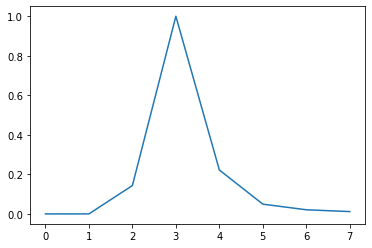

In [149]:
from sklearn import preprocessing
# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Transform the feature
df1 = df.loc[df.code=="FR"]
x = np.array(df1.deaths)
x2=x.reshape(-1,1)
scaled_feature = minmax_scale.fit_transform(x2)

import matplotlib.pyplot as plt
plt.plot(scaled_feature)
plt.show()

zscore

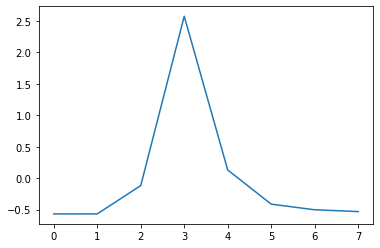

In [150]:
# Create scaler
scaler = preprocessing.StandardScaler() 
# Transform the feature
x = np.array(df1.deaths)
x2=x.reshape(-1,1)
standardized = scaler.fit_transform(x2)

plt.plot(standardized)
plt.show()